In [ ]:
import pandas as pd
import numpy as np



data = pd.read_csv('phishing_train.csv')

data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,0,1,1
1,-1,-1,1,1,1,-1,0,1,1,1,...,1,1,1,1,0,-1,-1,0,1,-1
2,1,1,1,1,1,1,0,1,-1,1,...,1,1,-1,1,0,-1,-1,0,1,1
3,-1,-1,-1,-1,-1,-1,1,-1,-1,1,...,1,1,1,-1,0,-1,-1,1,1,1
4,-1,-1,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,0,1,-1


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# splitting the data
X = data.drop(columns="Result")
y = data["Result"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

In [3]:
#here we are defining the classifier and defining the grid hyperparameters
rf = RandomForestClassifier(random_state=42)




#defining the grid search with number of trees, tree depth, and features
param_grid = {
    "n_estimators": [100, 200, 300],       # this is the number of trees
    "max_depth": [None, 5, 10, 20],        # this is the tree depth
    "max_features": ["sqrt", "log2", 0.5]  # this is the random subset of features
}


#applying grid search with a 5 fold cross validation
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)



#fitting the model
grid.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2', ...], 'n_estimators': [100, 200, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [4]:
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Cross-Validation Score: {grid.best_params_}")

Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'n_estimators': 200}
Best Cross-Validation Score: {'max_depth': 20, 'max_features': 'log2', 'n_estimators': 200}


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# predicting the test labels
y_pred = grid.predict(X_test)



# here we are calculating the accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)



# this is the confusion matrix
con_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(con_matrix)


Test Accuracy: 0.966647823629169

Confusion Matrix:
[[743  45]
 [ 14 967]]


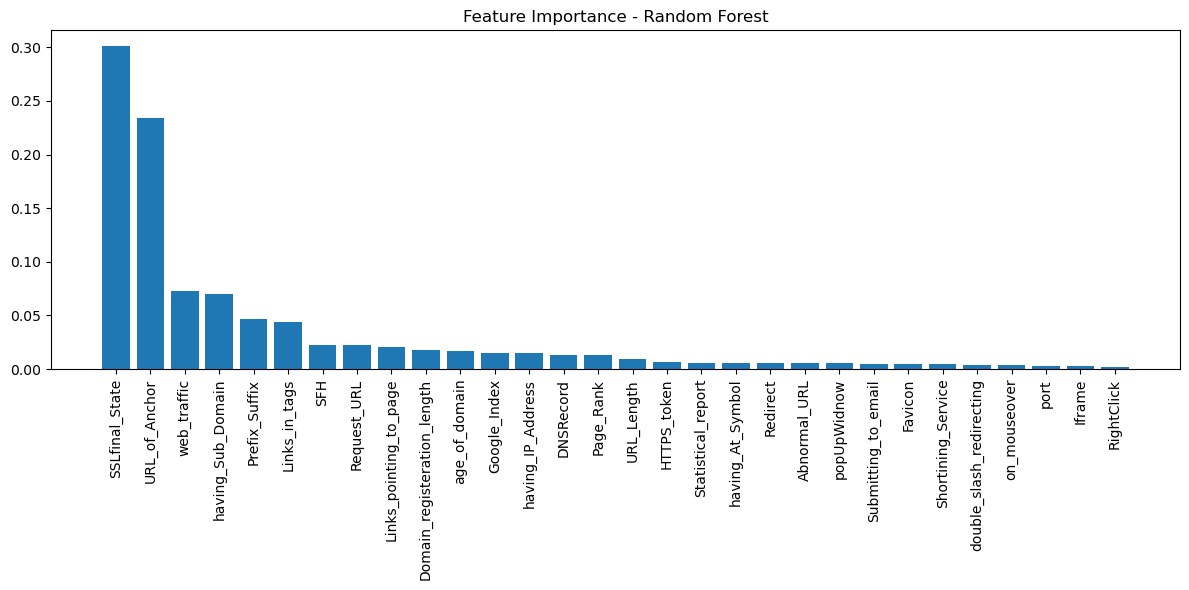

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Here we are getting and displaying the importance features
importances = grid.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


The features with the most significant impact are SSLfinal_State, URL_of_Anchor, web_traffic, and having_Sub_Domain